### Exercise 8.13
PH 295  
Nick Ball  
**Purpose:**
Calculates the orbits of two planets, Pluto and Earth, using the Bulirsch-Stoer method with a positional accuracy of 1km/yr.

*Equations of motion:*
$$
\frac{d^2 x}{dt^2} = -GM \frac{x}{R^3}, \, \, \, \, \frac{d^2 y}{dt^2} = -GM \frac{y}{R^3}
$$

a) Write (or modify) an equation to calculate the orbit of Earth to a positional accuracy of 1km/yr. Divide the orbit into intervals of H = 1 week and then calculate the solution for each interval using the combined modified midpoint/Richardson extrapolation method.

In [1]:
#Import functions
from numpy import empty, arange, array, sqrt
from matplotlib import pyplot as plt

In [4]:
#Define constants
G = 6.6738e-11          #m^3/kgs^2
M = 1.9891e30           #kg

#Define function
def f(r,t):    #not right, i dont think
    x = r[0]
    y = r[1]
    vx = r[2]
    vy = r[3]
    fx = vx
    fy = vy
    R = sqrt(x**2+y**2)
    fvx = -G*M*x/(R)**3
    fvy = -G*M*y/(R)**3
    return array([fx,fy,fvx,fvy],float)

#Define Bulirsch-Stoer
def BulStoer(h,ϵ,r):
    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
    
        #Do one modified midpoint step of size H to get things started
        n = 1
        r1 = r + 0.5*h*f(r,t)
        r2 = r + h*f(r1,t)
    
        #The array R1 stores the first row of the extrapolation table, which contains only the single
        #modified midpoint estimate of the solution at the end of the interval
        R1 = empty([1,4],float)
        R1[0] = 0.5*(r1+r2 + 0.5*h*f(r2,t))
    
        #Now increase n until the required accuracy is reached
        error = 2*h*ϵ    
        while error > h*ϵ:
            n += 1
            H = h/n
        
            #Modified midpoint method
            r1 = r + 0.5*H*f(r,t)
            r2 = r+H*f(r1,t)
            for i in range(n-1):
                r1 += H*f(r2,t)
                r2 += H*f(r1,t)
            
        #Calculate extrapolation estimates. Array R1 and R2 hold the two most recent lines of the table
            R2 = R1
            R1 = empty([n,4],float)
            R1[0] = 0.5*(r1 + r2 + 0.5*H*f(r2,t))
            for m in range(1,n):
                #print(n)
                epsilon = (R1[m-1]-R2[m-1])/((n/(n-1))**(2*m)-1)
                #print(epsilon)
                R1[m] = R1[m-1] + epsilon
            error = max(abs(epsilon[0]),abs(epsilon[1]))
        
        #Set r equal to the most accurate estimate we have, before moving on to the next big step
        r = R1[n-1]
    return 

In [38]:
#Define variables
xpoints = []
ypoints = []
r = array([1.4710e11,0,0,3.0287e4],float) #initial x & y positions and velocities in m & m/s
#v = array([0,3.0287e4],float)             #dont think we need

#Define time interval
hr = 3600           #s
a = 0               #s (can we do it in hrs or even days or weeks?)
b = 8800*hr
h = 187*hr          #1 week in seconds
tpoints = arange(a,b,h)

#BulStoer calculation
ϵ = 1000/3.154e7      #Error of 1km/yr  (i think)
BulStoer(h,ϵ,r)

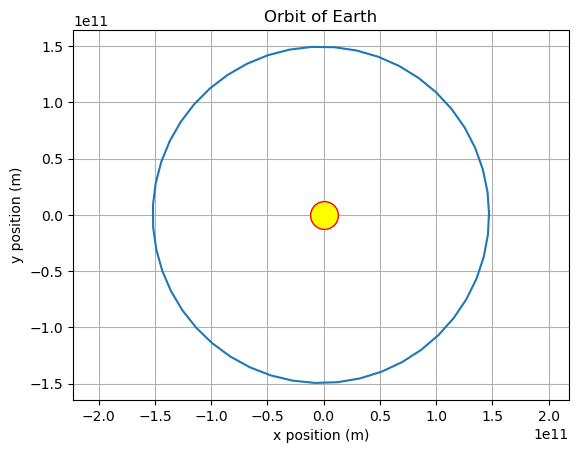

In [39]:
#Plot it
plt.figure(dpi = 100)
plt.plot(xpoints,ypoints)
plt.title("Orbit of Earth")
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.grid()
plt.plot(0, 0, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="yellow")
plt.axis("equal")
plt.show()

b) Modify the program to calculate the orbit of Pluto.

In [30]:
#Define variables
xpoints = []
ypoints = []
r = array([4.4368e12,0,0,6.1218e3],float) #initial x & y positions and velocities in m & m/s
#v = array([0,3.0287e4],float)             #dont think we need

#Define time interval
yr = 3.154e7        #s
a = 0               #s (can we do it in hrs or even days or weeks?)
b = 260*yr          #one orbit of pluto
h = 2*yr          #s
tpoints = arange(a,b,h)

#BulStoer calculation
ϵ = 1000/3.154e7      #Error of 1km/yr  (i think)
BulStoer(h,ϵ,r)

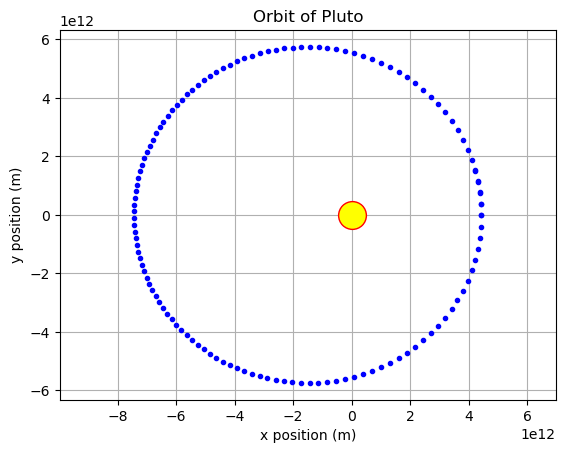

In [33]:
#Plot it
plt.figure(dpi = 100)
plt.plot(xpoints,ypoints,"b.")
plt.title("Orbit of Pluto")
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.grid()
plt.plot(0, 0, marker="o", markersize=20, markeredgecolor="red", markerfacecolor="yellow")
plt.axis("equal")
plt.show()

**Conclusion:**
Bulirsch Stoer method is very fast and efficient, but I still bungled the initial equation. Life is pain.